<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Battle of Neighborhoods in Nairobi City</font></h1>


## Data Description and Analysis Aproach

In this analysis we shall analyse motor vehicle accidents and crimes (Theft and vandalism) data to help motorists in deciding which divisions are riskier than others while choosing divisions to live, work or do business in. Results findings can also be used by insurance actuaries in creating models for discounting motor vehicle insurance premiums depending on the region or division where a motorist operates or lives.

Divisions will be clustered based on a five-year average combined motor accident and crime rate and we will further analyse the common venues from each division using four square data.

**a) Motor vehicle accidents and crimes (theft and vandalism) related data.** This will be collected from police division headquarters. Insurance companies in Kenya require a police report to pay any motor related claims. We will take an average of five-year incidences.
This data will assist in clustering of Nairobi city divisions into regions of varying motor risk status.

**b) Google Map search to get the Geo co-ordinates of each police division headquarters as the central point for the city divisions.**
Using police division headquarters geo-location, we can use four square data to find out the most common venues within each division and we can relate this data with population and average motor vehicle accident and crime incidences to infer correlations.

**c) We will use four square API to get most common venues** within a division using the division police headquarters as the central point.
We will review the connections between motor vehicle accident incidences with the four square rated common venues in each area.

**d)Population census data**
Using this data, we will infer if there is any correlation between motor vehicle accident incidences and population data of a regions. Four square data also on common areas will be reviewed again the population density and common areas returned.
Nairobi city divisions will be clustered based on the average motor vehicle and crimes reported incidences and most common areas from these divisions will be analyzed. Clustering will be based on high to low risk. From the results motorists (businesspeople and workers) will be able to make decisions on which divisions to live or work while insurances companies can use the findings to develop insurance premium discounting models. 



### Data Sample and features

In [1]:
# Load the necessary analysis libraries

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         240 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0

The following packages will be UPDATED:

  certifi                          2020.12.5-py36h5fab9bb_0 --> 2020.12.5-py36h5fab9bb_1



geopy-2.1.0          | 64 KB     

In [2]:
jupyter trust Battle_of_the_Neighborhoods-Nairobi-City-Main.ipynb

SyntaxError: invalid syntax (<ipython-input-2-07bbf33ba9e9>, line 1)

#### Load five year motor accident and crime data per police division head quarter with their geo positioning data
Main Data features that will be used are; **Police Division**, incidents
**5 Years Average**,**Latitude** and **Longitude**

In [33]:
#loading main data into a pandas data frame
Motor_acc_data = pd.read_csv("Motor_Vehicle_acc_crime_data.csv")
Motor_acc_data.head()

,P_Division,2019,2018,2017,2016,2015,Total,Average,Population,Latitude,Longitude
0,Central,207,257,236,198,246,"1,144",229,"206,564",-1.279451,36.818635
1,Kilimani,231,189,210,336,255,"1,221",244,"185,777",-1.291653,36.795152
2,Gigiri,173,206,223,420,176,"1,198",240,"308,854",-1.236273,36.808864
3,Buru Buru,145,242,208,241,228,"1,064",213,"545,200",-1.279361,36.878418
4,Embakasi,163,316,289,304,248,"1,320",264,"988,808",-1.309654,36.913263


In [4]:
#Explore Data
Motor_acc_data.describe()

,2019,2018,2017,2016,2015,Average,Latitude,Longitude
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,186.153846,230.230769,213.000000,232.153846,198.615385,212.153846,-1.291337,36.740661
std,99.762089,87.894021,91.191191,84.941986,82.541443,71.564477,0.255220,0.202474
min,67.000000,13.000000,13.000000,111.000000,6.000000,61.000000,-1.901200,36.287000
25%,129.000000,206.000000,148.000000,166.000000,157.000000,182.000000,-1.309654,36.724126
50%,173.000000,242.000000,210.000000,205.000000,209.000000,213.000000,-1.279451,36.808864
75%,219.000000,284.000000,269.000000,261.000000,248.000000,244.000000,-1.266942,36.835605
max,467.000000,342.000000,381.000000,420.000000,337.000000,354.000000,-0.667319,36.913263


In [5]:
# Basic information about the data frame

Motor_acc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   P_Division  13 non-null     object 
 1   2019        13 non-null     int64  
 2   2018        13 non-null     int64  
 3   2017        13 non-null     int64  
 4   2016        13 non-null     int64  
 5   2015        13 non-null     int64  
 6   Total       13 non-null     object 
 7   Average     13 non-null     int64  
 8   Population  13 non-null     object 
 9   Latitude    13 non-null     float64
 10  Longitude   13 non-null     float64
dtypes: float64(2), int64(6), object(3)
memory usage: 1.2+ KB


In [5]:
# useful for plotting later on
years = list(map(str, range(2015, 2020)))
years

['2015', '2016', '2017', '2018', '2019']

In [34]:
Motor_acc_data['Total']=Motor_acc_data['Total'].str.replace(',','').astype(int)
Motor_acc_data['Population']=Motor_acc_data['Population'].str.replace(',','').astype(int)

In [35]:
# import Matplot lib
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (18,8)
Motor_acc_data.head()

,P_Division,2019,2018,2017,2016,2015,Total,Average,Population,Latitude,Longitude
0,Central,207,257,236,198,246,1144,229,206564,-1.279451,36.818635
1,Kilimani,231,189,210,336,255,1221,244,185777,-1.291653,36.795152
2,Gigiri,173,206,223,420,176,1198,240,308854,-1.236273,36.808864
3,Buru Buru,145,242,208,241,228,1064,213,545200,-1.279361,36.878418
4,Embakasi,163,316,289,304,248,1320,264,988808,-1.309654,36.913263


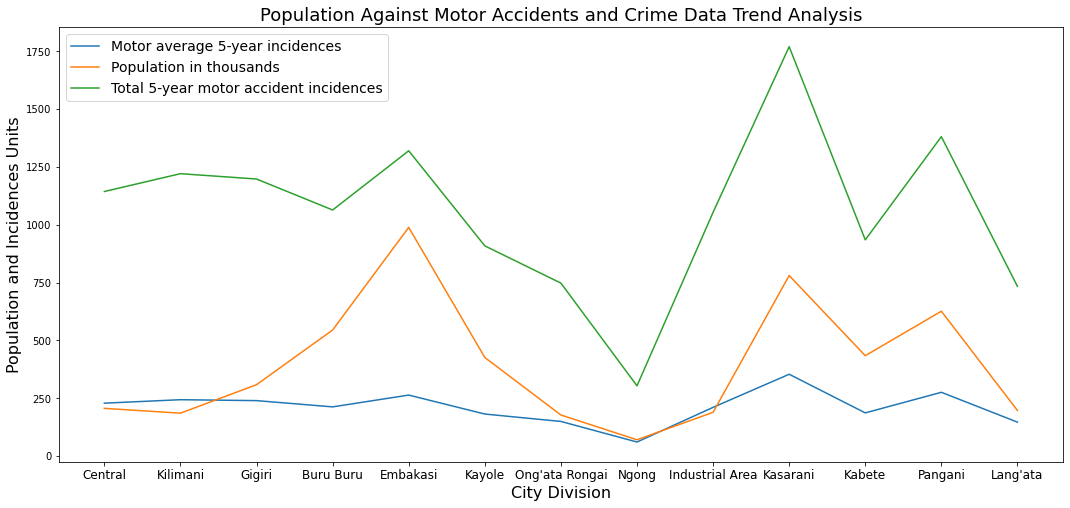

In [8]:
#Plot Motor vehicle incidences against the population to find the trend correlations
plt.plot(figsize=(14,8))
plt.plot(Motor_acc_data.P_Division, Motor_acc_data.Average)
plt.plot(Motor_acc_data.P_Division, Motor_acc_data.Population/10**3)
plt.plot(Motor_acc_data.P_Division, Motor_acc_data.Total)
plt.title('Population Against Motor Accidents and Crime Data Trend Analysis',fontsize = 18)
plt.legend(['Motor average 5-year incidences','Population in thousands','Total 5-year motor accident incidences'],fontsize = 14)
plt.xticks(fontsize = 12)
plt.xlabel('City Division',fontsize = 16)
plt.ylabel('Population and Incidences Units',fontsize = 16)
plt.show()

In [9]:
# Clustering of City Divisions
Motor_acc_data

,P_Division,2019,2018,2017,2016,2015,Total,Average,Population,Latitude,Longitude
0,Central,207,257,236,198,246,1144,229,206564,-1.279451,36.818635
1,Kilimani,231,189,210,336,255,1221,244,185777,-1.291653,36.795152
2,Gigiri,173,206,223,420,176,1198,240,308854,-1.236273,36.808864
3,Buru Buru,145,242,208,241,228,1064,213,545200,-1.279361,36.878418
4,Embakasi,163,316,289,304,248,1320,264,988808,-1.309654,36.913263
5,Kayole,124,264,146,166,209,909,182,426482,-1.270870,36.912845
6,Ong'ata Rongai,82,284,146,111,125,748,150,177800,-1.406750,36.714800
7,Ngong,67,13,13,205,6,304,61,70800,-1.901200,36.287000
8,Industrial Area,178,211,305,203,157,1054,211,189536,-1.294559,36.834616
9,Kasarani,467,324,381,261,337,1770,354,780656,-0.667319,36.324019


In [10]:
#insert Division Codes
#Division_Code = [1,2,3,4,5,6,7,8,9,10,11,12,13]
#Motor_acc_data['Division_Code'] = Division_Code
Motor_acc_data

,P_Division,2019,2018,2017,2016,2015,Total,Average,Population,Latitude,Longitude
0,Central,207,257,236,198,246,1144,229,206564,-1.279451,36.818635
1,Kilimani,231,189,210,336,255,1221,244,185777,-1.291653,36.795152
2,Gigiri,173,206,223,420,176,1198,240,308854,-1.236273,36.808864
3,Buru Buru,145,242,208,241,228,1064,213,545200,-1.279361,36.878418
4,Embakasi,163,316,289,304,248,1320,264,988808,-1.309654,36.913263
5,Kayole,124,264,146,166,209,909,182,426482,-1.270870,36.912845
6,Ong'ata Rongai,82,284,146,111,125,748,150,177800,-1.406750,36.714800
7,Ngong,67,13,13,205,6,304,61,70800,-1.901200,36.287000
8,Industrial Area,178,211,305,203,157,1054,211,189536,-1.294559,36.834616
9,Kasarani,467,324,381,261,337,1770,354,780656,-0.667319,36.324019


In [11]:
#code = Motor_acc_data['Division_Code']
#Motor_acc_data.drop('Division_Code', axis=1, inplace=True)
#Motor_acc_data.insert(0, 'Division_Code', code)
Motor_acc_data

,P_Division,2019,2018,2017,2016,2015,Total,Average,Population,Latitude,Longitude
0,Central,207,257,236,198,246,1144,229,206564,-1.279451,36.818635
1,Kilimani,231,189,210,336,255,1221,244,185777,-1.291653,36.795152
2,Gigiri,173,206,223,420,176,1198,240,308854,-1.236273,36.808864
3,Buru Buru,145,242,208,241,228,1064,213,545200,-1.279361,36.878418
4,Embakasi,163,316,289,304,248,1320,264,988808,-1.309654,36.913263
5,Kayole,124,264,146,166,209,909,182,426482,-1.270870,36.912845
6,Ong'ata Rongai,82,284,146,111,125,748,150,177800,-1.406750,36.714800
7,Ngong,67,13,13,205,6,304,61,70800,-1.901200,36.287000
8,Industrial Area,178,211,305,203,157,1054,211,189536,-1.294559,36.834616
9,Kasarani,467,324,381,261,337,1770,354,780656,-0.667319,36.324019


In [3]:
#Motor_acc_cluster=Motor_acc_data.drop('Latitude', axis=1)
Motor_acc_Cluster = pd.read_csv("Motor_data-Cluster.csv")
Motor_acc_Cluster.info()
Motor_acc_Cluster

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Division_Code  13 non-null     int64
 1   2019           13 non-null     int64
 2   2018           13 non-null     int64
 3   2017           13 non-null     int64
 4   2016           13 non-null     int64
 5   2015           13 non-null     int64
 6   Total          13 non-null     int64
 7   Average        13 non-null     int64
 8   Population     13 non-null     int64
dtypes: int64(9)
memory usage: 1.0 KB


,Division_Code,2019,2018,2017,2016,2015,Total,Average,Population
0,1,207,257,236,198,246,1144,229,206564
1,2,231,189,210,336,255,1221,244,185777
2,3,173,206,223,420,176,1198,240,308854
3,4,145,242,208,241,228,1064,213,545200
4,5,163,316,289,304,248,1320,264,988808
5,6,124,264,146,166,209,909,182,426482
6,7,82,284,146,111,125,748,150,177800
7,8,67,13,13,205,6,304,61,70800
8,9,178,211,305,203,157,1054,211,189536
9,10,467,324,381,261,337,1770,354,780656


In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [15]:
# Normalise Data Over Standard Deviation

from sklearn.preprocessing import StandardScaler
X = Motor_acc_Cluster.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.21749108,  0.31699879,  0.26251613, -0.41850269,  0.59751162,
         0.24357834,  0.24501028, -0.71714784],
       [ 0.46788672, -0.48825102, -0.03424123,  1.27247441,  0.71100003,
         0.46726818,  0.46317013, -0.79614091],
       [-0.13723607, -0.28693856,  0.11413745,  2.30176482, -0.285176  ,
         0.40045174,  0.40499417, -0.32843372],
       [-0.42936432,  0.13937016, -0.05706872,  0.10839597,  0.37053481,
         0.01117332,  0.01230645,  0.56970909],
       [-0.24156759,  1.01567142,  0.86744462,  0.88036378,  0.62273127,
         0.7548694 ,  0.75404992,  2.25547206],
       [-0.6484605 ,  0.39989216, -0.76472091, -0.81061333,  0.13094816,
        -0.43911142, -0.43855722,  0.11856662],
       [-1.08665287,  0.63673034, -0.76472091, -1.48455348, -0.92827699,
        -0.90682653, -0.90396488, -0.82645445],
       [-1.24315014, -2.572427  , -2.282749  , -0.33272849, -2.42884595,
        -2.19667443, -2.19837995, -1.23306713],
       [-0.08507031, -0.22772902

In [16]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 6)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 2 0 2 1 1 1 0 2 2 1]


In [18]:
Motor_acc_Cluster["Clus_km"] = labels
Motor_acc_Cluster

,Division_Code,2019,2018,2017,2016,2015,Total,Average,Population,Clus_km
0,1,207,257,236,198,246,1144,229,206564,1
1,2,231,189,210,336,255,1221,244,185777,1
2,3,173,206,223,420,176,1198,240,308854,1
3,4,145,242,208,241,228,1064,213,545200,2
4,5,163,316,289,304,248,1320,264,988808,0
5,6,124,264,146,166,209,909,182,426482,2
6,7,82,284,146,111,125,748,150,177800,1
7,8,67,13,13,205,6,304,61,70800,1
8,9,178,211,305,203,157,1054,211,189536,1
9,10,467,324,381,261,337,1770,354,780656,0


In [20]:
# Check the Centroids
Motor_acc_Cluster.groupby('Clus_km').mean()


,Division_Code,2019,2018,2017,2016,2015,Total,Average,Population
Clus_km,,,,,,,,,
0,7.500000,315.000000,320.000000,335.0,282.500000,292.500000,1545.000000,309.000000,884732.000000
1,6.142857,152.428571,185.142857,183.0,231.285714,162.857143,914.714286,183.142857,190974.285714
2,8.250000,180.750000,264.250000,204.5,208.500000,214.250000,1072.250000,214.500000,508093.000000


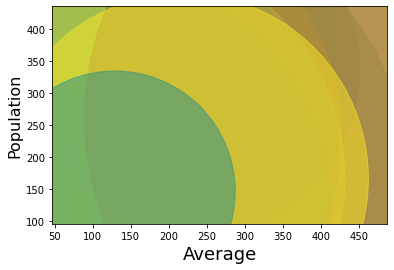

In [21]:
# Distribution of Divisions based on accident and crime average incidences and population size
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Average', fontsize=18)
plt.ylabel('Population', fontsize=16)

plt.show()

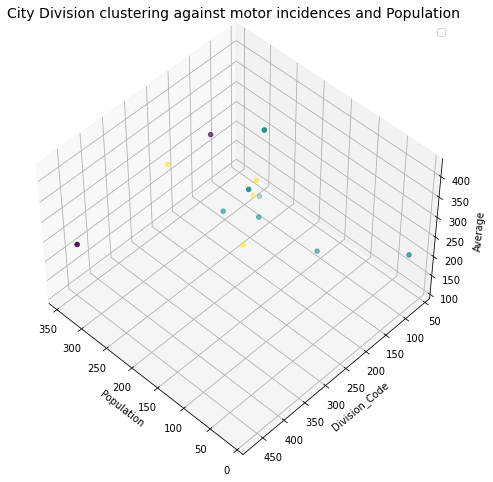

In [34]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

#plt.plot(figsize=(14,8))
plt.cla()
plt.title('City Division clustering against motor incidences and Population',fontsize = 14)
plt.legend(['High Risk','Medium Risk','Low Risk'])
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Population')
ax.set_ylabel('Division_Code')
ax.set_zlabel('Average')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

In [23]:
# Display Clusterd Data
Motor_acc_Cluster.sort_values(by = ["Clus_km"], axis=0, ascending = True)
Motor_acc_Cluster

,Division_Code,2019,2018,2017,2016,2015,Total,Average,Population,Clus_km
0,1,207,257,236,198,246,1144,229,206564,1
1,2,231,189,210,336,255,1221,244,185777,1
2,3,173,206,223,420,176,1198,240,308854,1
3,4,145,242,208,241,228,1064,213,545200,2
4,5,163,316,289,304,248,1320,264,988808,0
5,6,124,264,146,166,209,909,182,426482,2
6,7,82,284,146,111,125,748,150,177800,1
7,8,67,13,13,205,6,304,61,70800,1
8,9,178,211,305,203,157,1054,211,189536,1
9,10,467,324,381,261,337,1770,354,780656,0


In [32]:
#Name = Motor_acc_data['P_Division']
#Clustered_Data = Motor_acc_Cluster.insert(0, 'P_Division', Name)
#Clustered_Data.head()
Motor_acc_data


,P_Division,2019,2018,2017,2016,2015,Total,Average,Population,Latitude,Longitude
0,Central,207,257,236,198,246,1144,229,206564,-1.279451,36.818635
1,Kilimani,231,189,210,336,255,1221,244,185777,-1.291653,36.795152
2,Gigiri,173,206,223,420,176,1198,240,308854,-1.236273,36.808864
3,Buru Buru,145,242,208,241,228,1064,213,545200,-1.279361,36.878418
4,Embakasi,163,316,289,304,248,1320,264,988808,-1.309654,36.913263
5,Kayole,124,264,146,166,209,909,182,426482,-1.270870,36.912845
6,Ong'ata Rongai,82,284,146,111,125,748,150,177800,-1.406750,36.714800
7,Ngong,67,13,13,205,6,304,61,70800,-1.901200,36.287000
8,Industrial Area,178,211,305,203,157,1054,211,189536,-1.294559,36.834616
9,Kasarani,467,324,381,261,337,1770,354,780656,-0.667319,36.324019


In [33]:
Motor_acc_Cluster

,P_Division,Division_Code,2019,2018,2017,2016,2015,Total,Average,Population,Clus_km
0,Central,1,207,257,236,198,246,1144,229,206564,1
1,Kilimani,2,231,189,210,336,255,1221,244,185777,1
2,Gigiri,3,173,206,223,420,176,1198,240,308854,1
3,Buru Buru,4,145,242,208,241,228,1064,213,545200,2
4,Embakasi,5,163,316,289,304,248,1320,264,988808,0
5,Kayole,6,124,264,146,166,209,909,182,426482,2
6,Ong'ata Rongai,7,82,284,146,111,125,748,150,177800,1
7,Ngong,8,67,13,13,205,6,304,61,70800,1
8,Industrial Area,9,178,211,305,203,157,1054,211,189536,1
9,Kasarani,10,467,324,381,261,337,1770,354,780656,0


#### Initialize _k_-means - plot data points

In [39]:
Motor_acc_data

,P_Division,2019,2018,2017,2016,2015,Total,Average,Population,Latitude,Longitude
0,Central,207,257,236,198,246,1144,229,206564,-1.279451,36.818635
1,Kilimani,231,189,210,336,255,1221,244,185777,-1.291653,36.795152
2,Gigiri,173,206,223,420,176,1198,240,308854,-1.236273,36.808864
3,Buru Buru,145,242,208,241,228,1064,213,545200,-1.279361,36.878418
4,Embakasi,163,316,289,304,248,1320,264,988808,-1.309654,36.913263
5,Kayole,124,264,146,166,209,909,182,426482,-1.270870,36.912845
6,Ong'ata Rongai,82,284,146,111,125,748,150,177800,-1.406750,36.714800
7,Ngong,67,13,13,205,6,304,61,70800,-1.901200,36.287000
8,Industrial Area,178,211,305,203,157,1054,211,189536,-1.294559,36.834616
9,Kasarani,467,324,381,261,337,1770,354,780656,-0.667319,36.324019


# Clustering using Four Square API Data
## Nairobi City Divisions with Geo Co-ordinates

In [1]:
# Nairobi City Divisions with Geo Co-ordinates
Motor_acc_Mapping = pd.read_csv("Geospatial_Coordinates_Nairobi.csv")
Motor_acc_Mapping.info()
Motor_acc_Mapping

NameError: name 'pd' is not defined

In [4]:
# Get Nairobi City Geo-co-ordinates

address = 'Nairobi Kenya'

geolocator = Nominatim(user_agent="Nairobi_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Nairobi City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Nairobi City are -1.3031689499999999, 36.826061224105075.


# Map of Nairobi County with City Divisons

In [5]:
# create map of Manhattan using latitude and longitude values
map_Nairobi = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Motor_acc_Mapping['Latitude'], Motor_acc_Mapping['Longitude'], Motor_acc_Mapping['City_Division']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Nairobi)  
    
map_Nairobi

# Prepare Four Square Credentials to Query Common Venues

In [6]:
# Four Square Credentials
CLIENT_ID = '0RZESMDIOU4IXYFE5ZL1IECNFSPLH40UGSGBGOQOTXSW42Q1' # your Foursquare ID
CLIENT_SECRET = 'G1AZ2DW2N1YXDGOGQ4GUMGO35HH2CK5O4W5HYNQASXXEHPYT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0RZESMDIOU4IXYFE5ZL1IECNFSPLH40UGSGBGOQOTXSW42Q1
CLIENT_SECRET:G1AZ2DW2N1YXDGOGQ4GUMGO35HH2CK5O4W5HYNQASXXEHPYT


In [7]:
# Explore first Division
Motor_acc_Mapping.loc[0, 'City_Division']

'Central'

In [8]:
neighborhood_latitude = -1.279451
neighborhood_longitude = 36.818635
neighborhood_name = 'Central'

In [9]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=0RZESMDIOU4IXYFE5ZL1IECNFSPLH40UGSGBGOQOTXSW42Q1&client_secret=G1AZ2DW2N1YXDGOGQ4GUMGO35HH2CK5O4W5HYNQASXXEHPYT&v=20180605&ll=-1.279451,36.818635&radius=500&limit=100'

In [10]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '600d863b0d13d94ee1dcb57a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Nairobi Central Business District',
  'headerFullLocation': 'Nairobi Central Business District, Nairobi',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 22,
  'suggestedBounds': {'ne': {'lat': -1.2749509954999954,
    'lng': 36.823127722594265},
   'sw': {'lat': -1.2839510045000044, 'lng': 36.814142277405736}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ee0e5a902d596de2b323b18',
       'name': 'Tatu Restaurant',
       'location': {'address': 'Harry Thuku Road, P.O. Box 40064',
        'lat': -1.2782909080403024,
        'lng': 36.81638326805894,


In [11]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [12]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Tatu Restaurant,African Restaurant,-1.278291,36.816383
1,Fairmont Norfolk Hotel,Hotel,-1.278407,36.816310
2,CJ's,Coffee Shop,-1.283147,36.818323
3,Sno-Cream (Kenya House),Ice Cream Shop,-1.281560,36.817446
4,Nairobi Safari Club Hotel,Hotel,-1.280641,36.817685


In [13]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

22 venues were returned by Foursquare.


# Prepare a function to query all the common venues from all the other Nairobi City Divisions

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
Nairobi_venues = getNearbyVenues(names=Motor_acc_Mapping['City_Division'],
                                   latitudes=Motor_acc_Mapping['Latitude'],
                                   longitudes=Motor_acc_Mapping['Longitude']
                                  )

Central
Kilimani
Gigiri
Buru Buru
Embakasi
Kayole
Ong'ata Rongai
Ngong
Industrial Area
Kasarani
Kabete
Pangani
Lang'ata


In [16]:
#size of the resulting dataframe
print(Nairobi_venues.shape)
Nairobi_venues.head()

(185, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central,-1.279451,36.818635,Tatu Restaurant,-1.278291,36.816383,African Restaurant
1,Central,-1.279451,36.818635,CJ's,-1.283147,36.818323,Coffee Shop
2,Central,-1.279451,36.818635,Fairmont Norfolk Hotel,-1.278407,36.816310,Hotel
3,Central,-1.279451,36.818635,Najmi Fast Food,-1.280862,36.821209,Fast Food Restaurant
4,Central,-1.279451,36.818635,Sno-Cream (Kenya House),-1.281560,36.817446,Ice Cream Shop


In [17]:
Nairobi_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Buru Buru,9,9,9,9,9,9
Central,51,51,51,51,51,51
Embakasi,5,5,5,5,5,5
Gigiri,14,14,14,14,14,14
Industrial Area,9,9,9,9,9,9
Kabete,4,4,4,4,4,4
Kasarani,1,1,1,1,1,1
Kayole,10,10,10,10,10,10
Kilimani,41,41,41,41,41,41


In [18]:
print('There are {} uniques categories.'.format(len(Nairobi_venues['Venue Category'].unique())))

There are 70 uniques categories.


In [19]:
# Analyse the Neighborhood
# one hot encoding
nairobi_onehot = pd.get_dummies(Nairobi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nairobi_onehot['Neighborhood'] = Nairobi_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [nairobi_onehot.columns[-1]] + list(nairobi_onehot.columns[:-1])
nairobi_onehot = nairobi_onehot[fixed_columns]

nairobi_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Arcade,Art Gallery,BBQ Joint,Bakery,Bar,Beer Garden,Breakfast Spot,Brewery,Burger Joint,Bus Station,Café,Chinese Restaurant,Coffee Shop,Convenience Store,Cosmetics Shop,Department Store,Diner,Ethiopian Restaurant,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Fried Chicken Joint,Garden,Gas Station,Gym,Gym / Fitness Center,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Kebab Restaurant,Lake,Lounge,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Motel,Moving Target,Museum,Music Venue,Nightclub,Noodle House,Performing Arts Venue,Pizza Place,Playground,Pool,Print Shop,Pub,Restaurant,Sandwich Place,Sculpture Garden,Shopping Mall,Soccer Field,Soccer Stadium,Spa,Sports Bar,Steakhouse,Szechuan Restaurant,Tea Room,Thai Restaurant,Theater,Turkish Restaurant,Video Store,Women's Store
0,Central,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Central,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Central,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Central,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Central,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
#examine new dataframe
nairobi_onehot.shape

(185, 71)

In [21]:
nairobi_grouped = nairobi_onehot.groupby('Neighborhood').mean().reset_index()
nairobi_grouped

,Neighborhood,African Restaurant,American Restaurant,Arcade,Art Gallery,BBQ Joint,Bakery,Bar,Beer Garden,Breakfast Spot,Brewery,Burger Joint,Bus Station,Café,Chinese Restaurant,Coffee Shop,Convenience Store,Cosmetics Shop,Department Store,Diner,Ethiopian Restaurant,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Fried Chicken Joint,Garden,Gas Station,Gym,Gym / Fitness Center,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Kebab Restaurant,Lake,Lounge,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Motel,Moving Target,Museum,Music Venue,Nightclub,Noodle House,Performing Arts Venue,Pizza Place,Playground,Pool,Print Shop,Pub,Restaurant,Sandwich Place,Sculpture Garden,Shopping Mall,Soccer Field,Soccer Stadium,Spa,Sports Bar,Steakhouse,Szechuan Restaurant,Tea Room,Thai Restaurant,Theater,Turkish Restaurant,Video Store,Women's Store
0,Buru Buru,0.111111,0.000000,0.000000,0.00000,0.000000,0.111111,0.000000,0.00000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.222222,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.222222,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Central,0.137255,0.000000,0.000000,0.00000,0.000000,0.000000,0.039216,0.00000,0.000000,0.000000,0.000000,0.019608,0.098039,0.019608,0.156863,0.000000,0.000000,0.000000,0.00000,0.019608,0.039216,0.000000,0.019608,0.000000,0.019608,0.019608,0.00,0.00000,0.000000,0.000000,0.00000,0.078431,0.019608,0.019608,0.00000,0.039216,0.019608,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.019608,0.019608,0.00000,0.00000,0.039216,0.019608,0.000000,0.019608,0.019608,0.000000,0.000000,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.019608,0.019608,0.019608,0.019608,0.000000,0.000000
2,Embakasi,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.200000,0.00000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,0.00000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.200000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Gigiri,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.214286,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.00000,0.071429,0.000000,0.071429,0.00000,0.071429,0.000000,0.000000,0.000000,0.00000,0.00000,0.071429,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.00000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000
4,Industrial Area,0.000000,0.111111,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.00,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.111111,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00

In [22]:
# explore the new dataset
nairobi_grouped.shape

(12, 71)

# Print Each Divison with its top 5 common places

In [23]:
# Print each division
num_top_venues = 5

for hood in nairobi_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = nairobi_grouped[nairobi_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Buru Buru----
            venue  freq
0          Lounge  0.22
1             Gym  0.22
2     Bus Station  0.11
3     Flea Market  0.11
4  Soccer Stadium  0.11


----Central----
                   venue  freq
0            Coffee Shop  0.16
1     African Restaurant  0.14
2                   Café  0.10
3                  Hotel  0.08
4  Performing Arts Venue  0.04


----Embakasi----
                  venue  freq
0                  Café   0.2
1     Convenience Store   0.2
2                   Bar   0.2
3  Gym / Fitness Center   0.2
4  Fast Food Restaurant   0.2


----Gigiri----
                venue  freq
0        Burger Joint  0.21
1                Café  0.14
2  Italian Restaurant  0.07
3  Miscellaneous Shop  0.07
4      Ice Cream Shop  0.07


----Industrial Area----
                  venue  freq
0  Fast Food Restaurant  0.22
1   American Restaurant  0.11
2           Pizza Place  0.11
3        Ice Cream Shop  0.11
4            Food Court  0.11


----Kabete----
                venue  freq

In [24]:
# function to sort the venues into descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
# Display the top 10 venues of each division
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nairobi_grouped['Neighborhood']

for ind in np.arange(nairobi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nairobi_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Buru Buru,Lounge,Gym,African Restaurant,Flea Market,Bakery,Bus Station,Soccer Stadium,Food Court,Fast Food Restaurant,Food
1,Central,Coffee Shop,African Restaurant,Café,Hotel,Bar,Italian Restaurant,Fast Food Restaurant,Performing Arts Venue,Museum,Chinese Restaurant
2,Embakasi,Fast Food Restaurant,Convenience Store,Gym / Fitness Center,Bar,Café,Women's Store,Food Court,Flea Market,Food,Food & Drink Shop
3,Gigiri,Burger Joint,Café,Ethiopian Restaurant,Ice Cream Shop,Pizza Place,Thai Restaurant,Italian Restaurant,Hotel,Fast Food Restaurant,Spa
4,Industrial Area,Fast Food Restaurant,Food Court,American Restaurant,Ice Cream Shop,Bus Station,Fried Chicken Joint,Pizza Place,Soccer Field,Food & Drink Shop,Ethiopian Restaurant


# Nairobi City Divisions Clustering

In [26]:
# set number of clusters
kclusters = 5

nairobi_grouped_clustering = nairobi_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nairobi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:13] 


array([3, 3, 0, 3, 3, 4, 1, 3, 3, 3, 2, 3], dtype=int32)

In [27]:
# Top 10 venues with the clusters
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nairobi_merged = Motor_acc_Mapping

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
nairobi_merged = nairobi_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='City_Division')

nairobi_merged.head() # check the last columns!

,City_Division,Latitude,Longitude,Incidences,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central,-1.279451,36.818635,228.8,3.0,Coffee Shop,African Restaurant,Café,Hotel,Bar,Italian Restaurant,Fast Food Restaurant,Performing Arts Venue,Museum,Chinese Restaurant
1,Kilimani,-1.291653,36.795152,244.2,3.0,Bar,Hotel,Coffee Shop,African Restaurant,BBQ Joint,Beer Garden,Middle Eastern Restaurant,Lounge,Hookah Bar,Motel
2,Gigiri,-1.236273,36.808864,239.6,3.0,Burger Joint,Café,Ethiopian Restaurant,Ice Cream Shop,Pizza Place,Thai Restaurant,Italian Restaurant,Hotel,Fast Food Restaurant,Spa
3,Buru Buru,-1.279361,36.878418,212.8,3.0,Lounge,Gym,African Restaurant,Flea Market,Bakery,Bus Station,Soccer Stadium,Food Court,Fast Food Restaurant,Food
4,Embakasi,-1.309654,36.913263,264.0,0.0,Fast Food Restaurant,Convenience Store,Gym / Fitness Center,Bar,Café,Women's Store,Food Court,Flea Market,Food,Food & Drink Shop


In [30]:
#display(nairobi_merged.iloc[6])
#nairobi_merged.loc[6, 'Cluster Labels'] = 3
nairobi_merged
#nairobi_merged['Cluster Labels'] = nairobi_merged['Cluster Labels'].astype(int) 


,City_Division,Latitude,Longitude,Incidences,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central,-1.279451,36.818635,228.8,3,Coffee Shop,African Restaurant,Café,Hotel,Bar,Italian Restaurant,Fast Food Restaurant,Performing Arts Venue,Museum,Chinese Restaurant
1,Kilimani,-1.291653,36.795152,244.2,3,Bar,Hotel,Coffee Shop,African Restaurant,BBQ Joint,Beer Garden,Middle Eastern Restaurant,Lounge,Hookah Bar,Motel
2,Gigiri,-1.236273,36.808864,239.6,3,Burger Joint,Café,Ethiopian Restaurant,Ice Cream Shop,Pizza Place,Thai Restaurant,Italian Restaurant,Hotel,Fast Food Restaurant,Spa
3,Buru Buru,-1.279361,36.878418,212.8,3,Lounge,Gym,African Restaurant,Flea Market,Bakery,Bus Station,Soccer Stadium,Food Court,Fast Food Restaurant,Food
4,Embakasi,-1.309654,36.913263,264.0,0,Fast Food Restaurant,Convenience Store,Gym / Fitness Center,Bar,Café,Women's Store,Food Court,Flea Market,Food,Food & Drink Shop
5,Kayole,-1.270870,36.912845,181.8,3,Convenience Store,Bus Station,Gym / Fitness Center,Gym,Restaurant,Fast Food Restaurant,Pizza Place,Women's Store,Food,Ethiopian Restaurant
6,Ong'ata Rongai,-1.376750,36.714803,149.6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Ngong,-1.352700,36.669900,60.8,2,Bus Station,Women's Store,Department Store,Ethiopian Restaurant,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Fried Chicken Joint
8,Industrial Area,-1.294559,36.834616,210.8,3,Fast Food Restaurant,Food Court,American Restaurant,Ice Cream Shop,Bus Station,Fried Chicken Joint,Pizza Place,Soccer Field,Food & Drink Shop,Ethiopian Restaurant
9,Kasarani,-1.227841,36.905729,354.0,1,African Restaurant,Fried Chicken Joint,Ethiopian Restaurant,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Garden,Department Store


# Visualising Nairobi City resulting Clusters

In [31]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nairobi_merged['Latitude'], nairobi_merged['Longitude'], nairobi_merged['City_Division'], nairobi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [144]:
#Examine the clusters
nairobi_merged.loc[nairobi_merged['Cluster Labels'] == 0, nairobi_merged.columns[[1] + list(range(5, nairobi_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,-1.309654,Fast Food Restaurant,Convenience Store,Gym / Fitness Center,Bar,Café,Women's Store,Food Court,Flea Market,Food,Food & Drink Shop


In [145]:
nairobi_merged.loc[nairobi_merged['Cluster Labels'] == 1, nairobi_merged.columns[[1] + list(range(5, nairobi_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,-1.227841,African Restaurant,Fried Chicken Joint,Ethiopian Restaurant,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Garden,Department Store


In [146]:
nairobi_merged.loc[nairobi_merged['Cluster Labels'] == 2, nairobi_merged.columns[[1] + list(range(5, nairobi_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,-1.3527,Bus Station,Women's Store,Department Store,Ethiopian Restaurant,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Fried Chicken Joint


In [147]:
nairobi_merged.loc[nairobi_merged['Cluster Labels'] == 3, nairobi_merged.columns[[1] + list(range(5, nairobi_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,-1.279451,Coffee Shop,African Restaurant,Café,Hotel,Bar,Italian Restaurant,Fast Food Restaurant,Performing Arts Venue,Museum,Chinese Restaurant
1,-1.291653,Bar,Hotel,Coffee Shop,African Restaurant,BBQ Joint,Beer Garden,Middle Eastern Restaurant,Lounge,Hookah Bar,Motel
2,-1.236273,Burger Joint,Café,Ethiopian Restaurant,Ice Cream Shop,Pizza Place,Thai Restaurant,Italian Restaurant,Hotel,Fast Food Restaurant,Spa
3,-1.279361,Lounge,Gym,African Restaurant,Flea Market,Bakery,Bus Station,Soccer Stadium,Food Court,Fast Food Restaurant,Food
5,-1.270870,Convenience Store,Bus Station,Gym / Fitness Center,Gym,Restaurant,Fast Food Restaurant,Pizza Place,Women's Store,Food,Ethiopian Restaurant
6,-1.376750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-1.294559,Fast Food Restaurant,Food Court,American Restaurant,Ice Cream Shop,Bus Station,Fried Chicken Joint,Pizza Place,Soccer Field,Food & Drink Shop,Ethiopian Restaurant
11,-1.266942,Restaurant,Shopping Mall,Food & Drink Shop,Playground,Arcade,Ethiopian Restaurant,Fast Food Restaurant,Szechuan Restaurant,Moving Target,Department Store
12,-1.325719,Gym,Bar,Convenience Store,Pizza Place,Shopping Mall,Pub,Women's Store,Bus Station,Video Store,Lake


In [148]:
nairobi_merged.loc[nairobi_merged['Cluster Labels'] == 4, nairobi_merged.columns[[1] + list(range(5, nairobi_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,-1.257636,Ice Cream Shop,BBQ Joint,Gym,Garden,Hookah Bar,Hotel,Gym / Fitness Center,Hotel Bar,Gas Station,Department Store


In [47]:
#Population = Motor_acc_data['Population']
#Motor_acc_data.drop('Division_Code', axis=1, inplace=True)
#nairobi_merged = nairobi_merged.insert(3, 'Population_size', Population)
#nairobi_merged_all
#Population
nairobi_merged

,City_Division,Latitude,Longitude,Incidences,Population_size,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central,-1.279451,36.818635,228.8,206564,3,Coffee Shop,African Restaurant,Café,Hotel,Bar,Italian Restaurant,Fast Food Restaurant,Performing Arts Venue,Museum,Chinese Restaurant
1,Kilimani,-1.291653,36.795152,244.2,185777,3,Bar,Hotel,Coffee Shop,African Restaurant,BBQ Joint,Beer Garden,Middle Eastern Restaurant,Lounge,Hookah Bar,Motel
2,Gigiri,-1.236273,36.808864,239.6,308854,3,Burger Joint,Café,Ethiopian Restaurant,Ice Cream Shop,Pizza Place,Thai Restaurant,Italian Restaurant,Hotel,Fast Food Restaurant,Spa
3,Buru Buru,-1.279361,36.878418,212.8,545200,3,Lounge,Gym,African Restaurant,Flea Market,Bakery,Bus Station,Soccer Stadium,Food Court,Fast Food Restaurant,Food
4,Embakasi,-1.309654,36.913263,264.0,988808,0,Fast Food Restaurant,Convenience Store,Gym / Fitness Center,Bar,Café,Women's Store,Food Court,Flea Market,Food,Food & Drink Shop
5,Kayole,-1.270870,36.912845,181.8,426482,3,Convenience Store,Bus Station,Gym / Fitness Center,Gym,Restaurant,Fast Food Restaurant,Pizza Place,Women's Store,Food,Ethiopian Restaurant
6,Ong'ata Rongai,-1.376750,36.714803,149.6,177800,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Ngong,-1.352700,36.669900,60.8,70800,2,Bus Station,Women's Store,Department Store,Ethiopian Restaurant,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Fried Chicken Joint
8,Industrial Area,-1.294559,36.834616,210.8,189536,3,Fast Food Restaurant,Food Court,American Restaurant,Ice Cream Shop,Bus Station,Fried Chicken Joint,Pizza Place,Soccer Field,Food & Drink Shop,Ethiopian Restaurant
9,Kasarani,-1.227841,36.905729,354.0,780656,1,African Restaurant,Fried Chicken Joint,Ethiopian Restaurant,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Garden,Department Store
